In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HER.csv')
df

,atom,GH,rcov,rd,Ef,IE,EN,epsilon_d,n,q,d_occ,d_unocc
0,Sc,-0.190,1.70,0.310,-8.282,6.561,1.36,1.064,3,1.640,0.85,4.17
1,Ti,-0.500,1.60,0.280,-8.326,6.827,1.54,0.998,4,1.404,0.83,3.58
2,V,-0.270,1.53,0.260,-7.494,6.746,1.63,1.316,5,1.341,1.22,2.57
3,Cr,0.310,1.39,0.250,-6.604,6.766,1.66,0.944,6,1.263,2.36,0.98
4,Mn,0.430,1.39,0.230,-6.520,7.434,1.55,-0.513,7,1.279,1.33,2.46
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Ag,2.048,1.45,0.385,-3.331,7.576,1.93,-4.020,11,0.773,0.03,0.45
95,Cd,0.245,1.44,0.370,-2.291,8.994,1.69,-2.120,12,1.069,0.43,0.01
96,Hf,-1.127,1.75,0.630,-9.987,6.824,1.30,0.453,4,1.571,0.54,2.16
97,Ta,-1.092,1.70,0.605,-9.573,7.887,1.50,0.120,5,1.605,1.01,1.94


In [3]:
y = df['GH'].values
X = df.drop(['atom', 'GH'], axis = 'columns').values

In [4]:
X.shape, y.shape

((99, 10), (99,))

In [8]:
from  sklearn.preprocessing import MinMaxScaler

nms = MinMaxScaler()
X = nms.fit_transform(X)

In [11]:
from sklearn.utils import shuffle

X_r, y_r = shuffle(X, y)
X_train, y_train = X_r[:-20, :], y_r[:-20]
X_test, y_test = X_r[-20:, :], y_r[-20:]

In [13]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

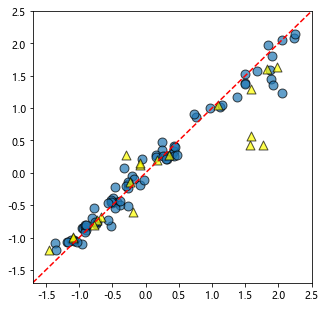

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_train, svr.predict(X_train), s = 80, edgecolor = 'k', alpha = 0.7)
plt.scatter(y_test, svr.predict(X_test), s = 80, color = 'yellow', marker = '^', edgecolor = 'k', alpha = 0.7)
plt.plot([-1.7, 2.5], [-1.7, 2.5], 'r--')
plt.xlim(-1.7, 2.5)
plt.ylim(-1.7, 2.5)
plt.show()

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(svr, X, y, scoring = 'r2', cv = 5)
rmse_scores = cross_val_score(svr, X, y, scoring = 'neg_root_mean_squared_error', cv = 5)
print('Folds: %i, mean R2: %.3f' % (len(r2_scores), np.mean(r2_scores)))
print('Folds: %i, mean RMSE: %.3f' % (len(rmse_scores), -np.mean(rmse_scores)))

Folds: 5, mean R2: 0.924
Folds: 5, mean RMSE: 0.269
